In [20]:
import numpy as np
import pandas as pd
import gc
from multiprocessing import Pool

import cmasher as cmr
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=Warning) 
from scipy import stats
from minepy import MINE

path_csv = "/media/temp/bego/snapshots_resim/"
path_datos = "/home/bego/GARROTXA_copia/datos_GARROTXA_resim/"
path_results = "/home/bego/GARROTXA/GalaDyn/results/"
path_crossmatch = "/home/bego/GARROTXA/satelites_crossmatch/"
path_figures_acceleration = "/home/bego/GARROTXA/aceleration_figures/"
path_figures = "/home/bego/GARROTXA/acceleration_figures/"
path_acceleration = "/home/bego/GARROTXA/acceleration/"
path_disk = "/home/bego/GARROTXA/disco/"
seconds_to_Myr = 3.15576e+16

In [21]:
df15 = pd.read_csv(path_results + f"10-15kpc_dynamic_data.csv", sep = ",", index_col = 0)
df10 = pd.read_csv(path_results + f"5-10kpc_dynamic_data.csv", sep = ",", index_col = 0)
df5 = pd.read_csv(path_results + f"0-5kpc_dynamic_data.csv", sep = ",", index_col = 0)

In [22]:

def add_satellites(ax):
    transparencia = 0.4
    tamaño = 2   
    #arania
    ax.axvline(x = 6.32, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
    ax.axvline(x = 3.90, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
    ax.axvline(x = 1.93,ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
    ax.axvline(x = 0.17, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
    #Grillo
    ax.axvline(x = 6.86,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
    ax.axvline(x = 5.21,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
    ax.axvline(x = 3.42,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
    ax.axvline(x = 1.62,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
    ax.axvline(x = 0.04,ls='--',c = "red", linewidth =tamaño, alpha = transparencia)
    #mosquito
    ax.axvline(x = 7.30,ls='--', c = "magenta", linewidth =tamaño, alpha = transparencia)
    ax.axvline(x = 5.63,ls='--', c = "magenta", linewidth =tamaño, alpha =transparencia)
    ax.axvline(x = 3.99, ls='--',c = "magenta", linewidth =tamaño, alpha = transparencia)
    ax.axvline(x = 2.09,ls='--', c = "magenta", linewidth =tamaño, alpha = transparencia)
    ax.axvline(x = 0.1,ls='--', c = "magenta", linewidth =tamaño, alpha = transparencia)

In [23]:
variables = ["Z", "VZ", "density", "DM", "Gas", "All"]
rings = ["5", "10", "15"]
correlations = {}
#generation of dictionary
for ring in rings:
    for var1 in variables:
        for var2 in variables:
            correlations[f"{var1}_{var2}_{ring}"] = []

In [24]:
def calculate_correlation (var1, var2, df):
   # print(stats.spearmanr(df[f"{var1}"],df[f"{var2}"]).pvalue)
    if stats.spearmanr(df[f"{var1}"],df[f"{var2}"]).pvalue > 0.05:
        return 0
    else:
        return stats.spearmanr(df[f"{var1}"],df[f"{var2}"]).correlation

    

In [25]:
variables = ["Z", "VZ", "density", "DM", "Gas", "All"]
rings = ["5", "10", "15"]
correlations = {}
#generation of dictionary
for ring in rings:
    for var1 in variables:
        for var2 in variables:
            correlations[f"{var1}_{var2}_{ring}"] = []
window = 1.5
lookback = []
for lb in df15["Lookback"]:
    print(lb)
    lookback.append(lb)
    df_w15 = df15[(df15["Lookback"]<lb + window/2)&(df15["Lookback"]>lb - window/2)]
    df_w10 = df10[(df10["Lookback"]<lb + window/2)&(df10["Lookback"]>lb - window/2)]
    df_w5 = df5[(df5["Lookback"]<lb + window/2)&(df5["Lookback"]>lb - window/2)]
    for ring in rings:
        for var1 in variables:
            for var2 in variables:
          #      print(f"calculatin in ring {ring}, variables {var1}, {var2}")
                if ring == '5':
                    correlations[f"{var1}_{var2}_{ring}"].append(calculate_correlation (var1, var2, df_w5))
                elif ring == '10':
                    correlations[f"{var1}_{var2}_{ring}"].append(calculate_correlation (var1, var2, df_w10))
                elif ring == '15':
                    correlations[f"{var1}_{var2}_{ring}"].append(calculate_correlation (var1, var2, df_w15))
                    
    
            

7.641375389072152
7.596713167865263
7.566683618057125
7.53339063655954
7.482979561017268
7.445622694073074
7.388982983834753
7.368028485131425
7.32581407574925
7.304554308275986
7.271496275648464
7.236227198877431
7.19831221169613
7.152681385740628
7.099260464270884
7.075557727315488
7.039764478602527
6.986751233784402
6.943909723553674
6.8992999999999975
6.866292168543732
6.816364909661479
6.779399361578653
6.742137004320504
6.7130773554740495
6.66005882533
6.613862820712693
6.573229915265312
6.539376586173443
6.489295405186351
6.462779928727577
6.420803680733952
6.3912357509248015
6.360037918593159
6.323181769898123
6.296819541234349
6.257021370782392
6.198067183682968
6.166826674452982
6.133891202463207
6.100719280344513
6.067346103953526
6.032072868913223
5.9948320266449295
5.957324003606695
5.9365639909968575
5.894811696137233
5.85272746861963
5.829423163299706
5.806019824366869
5.758847580686567
5.735113676933862
5.687351268637958
5.674282004200253
5.63487750476342
5.607096887071

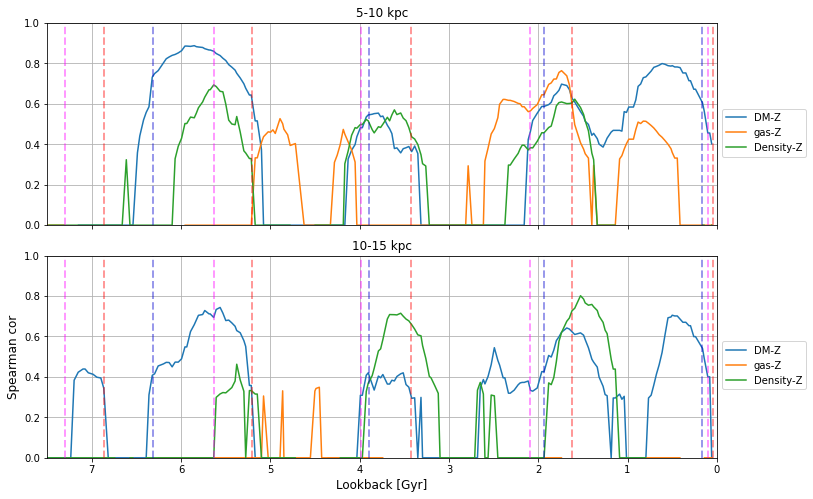

In [26]:
fig, ax = plt.subplots(2,1, sharex=True, sharey=True,figsize = (12,8))
fig.subplots_adjust(hspace=0.15, wspace=0)

ax[0].set_title("5-10 kpc")
#ax.plot(lookback,cor_all_Z_10,label = "All-Z")
ax[0].plot(lookback,correlations["DM_Z_10"],label = "DM-Z")
ax[0].plot(lookback,correlations["Gas_Z_10"],label = "gas-Z")
ax[0].plot(lookback,correlations["density_Z_10"],label = "Density-Z")
#ax.plot(lookback,cor_disk_Z_10,label = "Disk-Z")
#ax.plot(lookback,cor_dm_VZ_10,label = "DM-VZ")
#ax.plot(lookback,cor_dm_den_10,label = "DM-density")
#ax.plot(lookback,cor_Z_den_10,label = "density-Z")
#ax.plot(lookback,cor_VZ_den_10,label = "density-VZ")
ax[0].set_xlim(7.5,0)
ax[0].set_ylim(0,1)
ax[0].grid()
ax[0].legend(bbox_to_anchor = (1., 0.6))
add_satellites(ax[0])
ax[1].set_title("10-15 kpc")
ax[1].plot(lookback,correlations["DM_Z_15"],label = "DM-Z")
ax[1].plot(lookback,correlations["Gas_Z_15"],label = "gas-Z")
ax[1].plot(lookback,correlations["density_Z_15"],label = "Density-Z")
#ax.plot(lookback,cor_disk_Z_15,label = "Disk-Z")
#ax.plot(lookback,cor_dm_den_15,label = "DM-density")
#ax.plot(lookback,cor_Z_den_15,label = "density-Z")
#ax.plot(lookback,cor_VZ_den_15,label = "density-VZ")
ax[1].set_xlim(7.5,0)
ax[1].set_ylim(0,1)
add_satellites(ax[1])
ax[1].grid()
ax[1].legend(bbox_to_anchor = (1., 0.6))
ax[1].set_xlabel('Lookback [Gyr]', fontsize = 12)
ax[1].set_ylabel('Spearman cor', fontsize = 12)
#plt.show()   
plt.savefig("results/correlations_Z.png", dpi = 100, facecolor = "white")

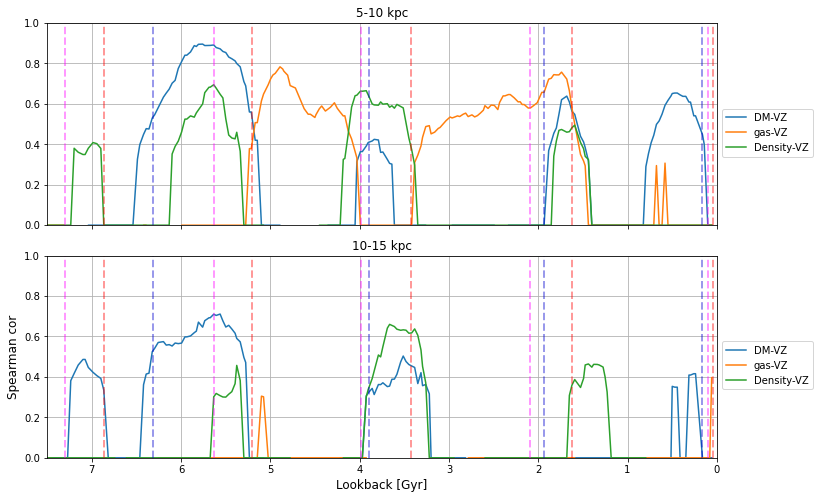

In [27]:
fig, ax = plt.subplots(2,1, sharex=True, sharey=True,figsize = (12,8))
fig.subplots_adjust(hspace=0.15, wspace=0)

ax[0].set_title("5-10 kpc")
#ax.plot(lookback,cor_all_Z_10,label = "All-Z")
ax[0].plot(lookback,correlations["DM_VZ_10"],label = "DM-VZ")
ax[0].plot(lookback,correlations["Gas_VZ_10"],label = "gas-VZ")
ax[0].plot(lookback,correlations["density_VZ_10"],label = "Density-VZ")
#ax.plot(lookback,cor_disk_Z_10,label = "Disk-Z")
#ax.plot(lookback,cor_dm_VZ_10,label = "DM-VZ")
#ax.plot(lookback,cor_dm_den_10,label = "DM-density")
#ax.plot(lookback,cor_Z_den_10,label = "density-Z")
#ax.plot(lookback,cor_VZ_den_10,label = "density-VZ")
ax[0].set_xlim(7.5,0)
ax[0].set_ylim(0,1)
ax[0].grid()
ax[0].legend(bbox_to_anchor = (1., 0.6))
add_satellites(ax[0])
ax[1].set_title("10-15 kpc")
ax[1].plot(lookback,correlations["DM_VZ_15"],label = "DM-VZ")
ax[1].plot(lookback,correlations["Gas_VZ_15"],label = "gas-VZ")
ax[1].plot(lookback,correlations["density_VZ_15"],label = "Density-VZ")
#ax.plot(lookback,cor_disk_Z_15,label = "Disk-Z")
#ax.plot(lookback,cor_dm_den_15,label = "DM-density")
#ax.plot(lookback,cor_Z_den_15,label = "density-Z")
#ax.plot(lookback,cor_VZ_den_15,label = "density-VZ")
ax[1].set_xlim(7.5,0)
ax[1].set_ylim(0,1)
add_satellites(ax[1])
ax[1].grid()
ax[1].legend(bbox_to_anchor = (1., 0.6))
ax[1].set_xlabel('Lookback [Gyr]', fontsize = 12)
ax[1].set_ylabel('Spearman cor', fontsize = 12)
#plt.show()   

plt.savefig("results/correlations_VZ.png", dpi = 100, facecolor = "white")

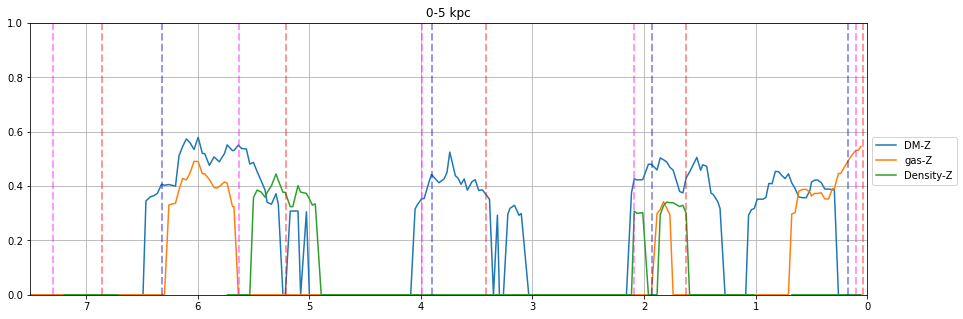

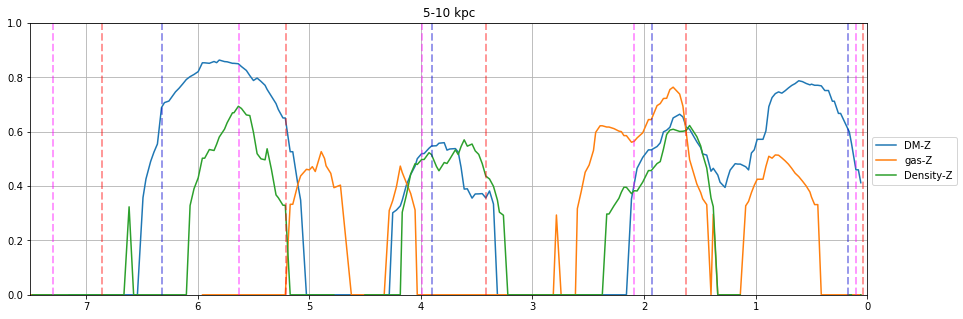

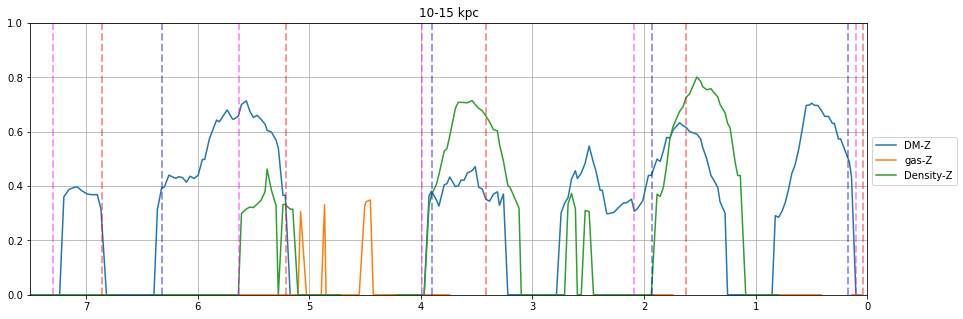

In [7]:
fig, ax = plt.subplots(figsize = (15,5))
ax.set_title("0-5 kpc")

ax.plot(lookback,correlations["DM_Z_5"],label = "DM-Z")
ax.plot(lookback,correlations["Gas_Z_5"],label = "gas-Z")
ax.plot(lookback,correlations["density_Z_5"],label = "Density-Z")
#ax.plot(lookback,cor_disk_Z_5,label = "Disk-Z")
#ax.plot(lookback,cor_dm_den_5,label = "DM-density")
#ax.plot(lookback,cor_Z_den_5,label = "density-Z")
#ax.plot(lookback,cor_VZ_den_5,label = "density-VZ")

ax.set_xlim(7.5,0)
ax.set_ylim(0,1)
ax.grid()
ax.legend(bbox_to_anchor = (1., 0.6))
add_satellites(ax)
plt.show()

fig, ax = plt.subplots(figsize = (15,5))
ax.set_title("5-10 kpc")
#ax.plot(lookback,cor_all_Z_10,label = "All-Z")
ax.plot(lookback,correlations["DM_Z_10"],label = "DM-Z")
ax.plot(lookback,correlations["Gas_Z_10"],label = "gas-Z")
ax.plot(lookback,correlations["density_Z_10"],label = "Density-Z")
#ax.plot(lookback,cor_disk_Z_10,label = "Disk-Z")
#ax.plot(lookback,cor_dm_VZ_10,label = "DM-VZ")
#ax.plot(lookback,cor_dm_den_10,label = "DM-density")
#ax.plot(lookback,cor_Z_den_10,label = "density-Z")
#ax.plot(lookback,cor_VZ_den_10,label = "density-VZ")
ax.set_xlim(7.5,0)
ax.set_ylim(0,1)
ax.grid()
ax.legend(bbox_to_anchor = (1., 0.6))
add_satellites(ax)
plt.show()

fig, ax = plt.subplots(figsize = (15,5))
ax.set_title("10-15 kpc")
#ax.plot(lookback,cor_all_Z_15,label = "All-Z")
ax.plot(lookback,correlations["DM_Z_15"],label = "DM-Z")
ax.plot(lookback,correlations["Gas_Z_15"],label = "gas-Z")
ax.plot(lookback,correlations["density_Z_15"],label = "Density-Z")
#ax.plot(lookback,cor_disk_Z_15,label = "Disk-Z")
#ax.plot(lookback,cor_dm_den_15,label = "DM-density")
#ax.plot(lookback,cor_Z_den_15,label = "density-Z")
#ax.plot(lookback,cor_VZ_den_15,label = "density-VZ")
ax.set_xlim(7.5,0)
ax.set_ylim(0,1)
add_satellites(ax)
ax.grid()
ax.legend(bbox_to_anchor = (1., 0.6))
plt.show()   

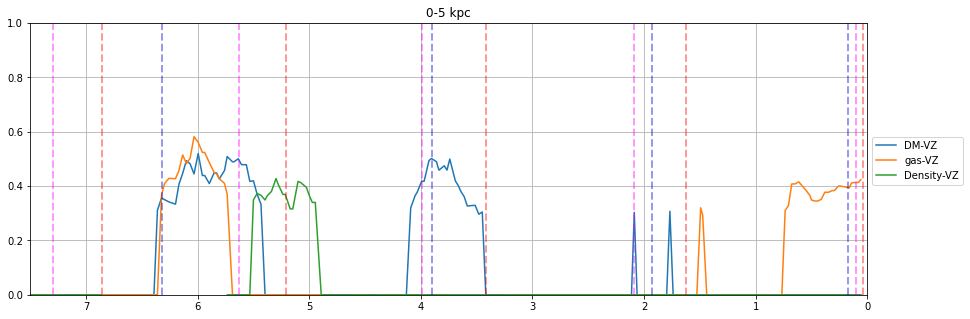

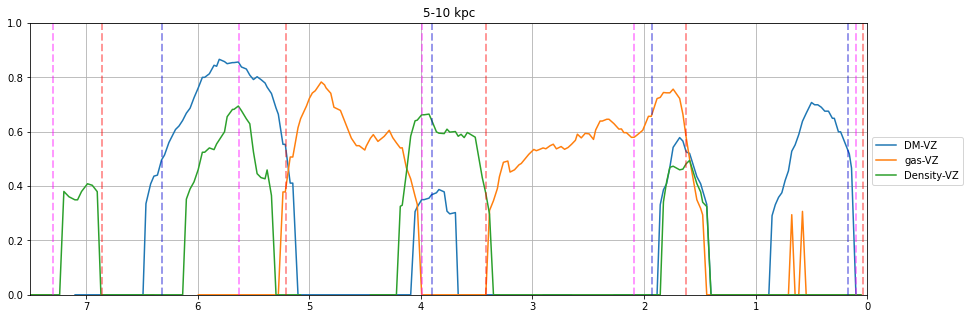

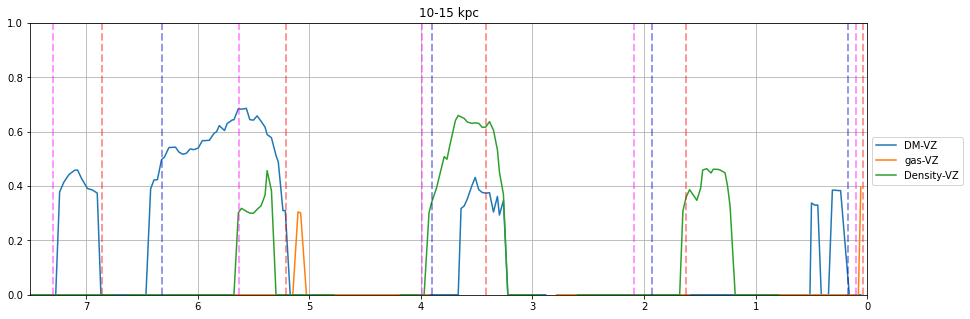

In [7]:
fig, ax = plt.subplots(figsize = (15,5))
ax.set_title("0-5 kpc")

ax.plot(lookback,correlations["DM_VZ_5"],label = "DM-VZ")
ax.plot(lookback,correlations["Gas_VZ_5"],label = "gas-VZ")
ax.plot(lookback,correlations["density_VZ_5"],label = "Density-VZ")
#ax.plot(lookback,cor_disk_VZ_5,label = "Disk-VZ")
#ax.plot(lookback,cor_dm_den_5,label = "DM-density")
#ax.plot(lookback,cor_VZ_den_5,label = "density-VZ")
#ax.plot(lookback,cor_VVZ_den_5,label = "density-VVZ")

ax.set_xlim(7.5,0)
ax.set_ylim(0,1)
ax.grid()
ax.legend(bbox_to_anchor = (1., 0.6))
add_satellites(ax)
plt.show()

fig, ax = plt.subplots(figsize = (15,5))
ax.set_title("5-10 kpc")
#ax.plot(lookback,cor_all_VZ_10,label = "All-VZ")
ax.plot(lookback,correlations["DM_VZ_10"],label = "DM-VZ")
ax.plot(lookback,correlations["Gas_VZ_10"],label = "gas-VZ")
ax.plot(lookback,correlations["density_VZ_10"],label = "Density-VZ")
#ax.plot(lookback,cor_disk_VZ_10,label = "Disk-VZ")
#ax.plot(lookback,cor_dm_VVZ_10,label = "DM-VVZ")
#ax.plot(lookback,cor_dm_den_10,label = "DM-density")
#ax.plot(lookback,cor_VZ_den_10,label = "density-VZ")
#ax.plot(lookback,cor_VVZ_den_10,label = "density-VVZ")
ax.set_xlim(7.5,0)
ax.set_ylim(0,1)
ax.grid()
ax.legend(bbox_to_anchor = (1., 0.6))
add_satellites(ax)
plt.show()

fig, ax = plt.subplots(figsize = (15,5))
ax.set_title("10-15 kpc")
#ax.plot(lookback,cor_all_VZ_15,label = "All-VZ")
ax.plot(lookback,correlations["DM_VZ_15"],label = "DM-VZ")
ax.plot(lookback,correlations["Gas_VZ_15"],label = "gas-VZ")
ax.plot(lookback,correlations["density_VZ_15"],label = "Density-VZ")
#ax.plot(lookback,cor_disk_Z_15,label = "Disk-Z")
#ax.plot(lookback,cor_dm_den_15,label = "DM-density")
#ax.plot(lookback,cor_Z_den_15,label = "density-Z")
#ax.plot(lookback,cor_VZ_den_15,label = "density-VZ")
ax.set_xlim(7.5,0)
ax.set_ylim(0,1)
add_satellites(ax)
ax.grid()
ax.legend(bbox_to_anchor = (1., 0.6))
plt.show()   

In [70]:
len(lookback)

224

In [ ]:
window = 1.5 #Gyr
#generation of dictionary
cor_dm_Z_5 = []
cor_dm_Z_10 = []
cor_dm_Z_15 = []

cor_all_Z_5 = []
cor_all_Z_10 = []
cor_all_Z_15 = []

cor_gas_Z_5 = []
cor_gas_Z_10 = []
cor_gas_Z_15 = []

cor_disk_Z_5 = []
cor_disk_Z_10 = []
cor_disk_Z_15 = []

cor_dm_VZ_5 = []
cor_dm_VZ_10 = []
cor_dm_VZ_15 = []

cor_all_VZ_5 = []
cor_all_VZ_10 = []
cor_all_VZ_15 = []

cor_gas_VZ_5 = []
cor_gas_VZ_10 = []
cor_gas_VZ_15 = []

cor_disk_VZ_5 = []
cor_disk_VZ_10 = []
cor_disk_VZ_15 = []

cor_dm_den_5 = []
cor_dm_den_10 = []
cor_dm_den_15 = []

cor_gas_den_5 = []
cor_gas_den_10 = []
cor_gas_den_15 = []

cor_disk_den_5 = []
cor_disk_den_10 = []
cor_disk_den_15 = []

cor_Z_den_5 = []
cor_Z_den_10 = []
cor_Z_den_15 = []

cor_VZ_den_5 = []
cor_VZ_den_10 = []
cor_VZ_den_15 = []


lookback_tot = []


for lb in d15["Lookback"]:
    df_w15 = df15[(df15["Lookback"]<lb + window/2)&(df15["Lookback"]>lb - window/2)]
    df_w10 = df10[(df10["Lookback"]<lb + window/2)&(df10["Lookback"]>lb - window/2)]
    df_w5 = df5[(df5["Lookback"]<lb + window/2)&(df5["Lookback"]>lb - window/2)]
    cor_dm_Z_5.append(stats.spearmanr(df_w5["DM"],df_w5["Z"]).correlation)
    cor_dm_Z_10.append(stats.spearmanr(df_w10["DM"],df_w10["Z"]).correlation)
    cor_dm_Z_15.append(stats.spearmanr(df_w15["DM"],df_w15["Z"]).correlation)
    
    cor_all_Z_5.append(stats.spearmanr(df_w5["All"],df_w5["Z"]).correlation)
    cor_all_Z_10.append(stats.spearmanr(df_w10["All"],df_w10["Z"]).correlation)
    cor_all_Z_15.append(stats.spearmanr(df_w15["All"],df_w15["Z"]).correlation)

    cor_gas_Z_5.append(stats.spearmanr(df_w5["Gas"],df_w5["Z"]).correlation)
    cor_gas_Z_10.append(stats.spearmanr(df_w10["Gas"],df_w10["Z"]).correlation)
    cor_gas_Z_15.append(stats.spearmanr(df_w15["Gas"],df_w15["Z"]).correlation)

    cor_disk_Z_5.append(stats.spearmanr(df_w5["Disk"],df_w5["Z"]).correlation)
    cor_disk_Z_10.append(stats.spearmanr(df_w10["Disk"],df_w10["Z"]).correlation)
    cor_disk_Z_15.append(stats.spearmanr(df_w15["Disk"],df_w15["Z"]).correlation)

    
    cor_dm_VZ_5.append(stats.spearmanr(df_w5["DM"],df_w5["VZ"]).correlation)
    cor_dm_VZ_10.append(stats.spearmanr(df_w10["DM"],df_w10["VZ"]).correlation)
    cor_dm_VZ_15.append(stats.spearmanr(df_w15["DM"],df_w15["VZ"]).correlation)
    
    cor_all_VZ_5.append(stats.spearmanr(df_w5["All"],df_w5["VZ"]).correlation)
    cor_all_VZ_10.append(stats.spearmanr(df_w10["All"],df_w10["VZ"]).correlation)
    cor_all_VZ_15.append(stats.spearmanr(df_w15["All"],df_w15["VZ"]).correlation)

    cor_gas_VZ_5.append(stats.spearmanr(df_w5["Gas"],df_w5["VZ"]).correlation)
    cor_gas_VZ_10.append(stats.spearmanr(df_w10["Gas"],df_w10["VZ"]).correlation)
    cor_gas_VZ_15.append(stats.spearmanr(df_w15["Gas"],df_w15["VZ"]).correlation)

    cor_disk_VZ_5.append(stats.spearmanr(df_w5["Disk"],df_w5["VZ"]).correlation)
    cor_disk_VZ_10.append(stats.spearmanr(df_w10["Disk"],df_w10["VZ"]).correlation)
    cor_disk_VZ_15.append(stats.spearmanr(df_w15["Disk"],df_w15["VZ"]).correlation)

    cor_dm_den_5.append(stats.spearmanr(df_w5["DM"],df_w5["density"]).correlation)
    cor_dm_den_10.append(stats.spearmanr(df_w10["DM"],df_w10["density"]).correlation)
    cor_dm_den_15.append(stats.spearmanr(df_w15["DM"],df_w15["density"]).correlation)
    
    cor_gas_den_5.append(stats.spearmanr(df_w5["Gas"],df_w5["density"]).correlation)
    cor_gas_den_10.append(stats.spearmanr(df_w10["Gas"],df_w10["density"]).correlation)
    cor_gas_den_15.append(stats.spearmanr(df_w15["Gas"],df_w15["density"]).correlation)

    cor_disk_den_5.append(stats.spearmanr(df_w5["Disk"],df_w5["density"]).correlation)
    cor_disk_den_10.append(stats.spearmanr(df_w10["Disk"],df_w10["density"]).correlation)
    cor_disk_den_15.append(stats.spearmanr(df_w15["Disk"],df_w15["density"]).correlation)


    cor_Z_den_5.append(stats.spearmanr(df_w5["density"],df_w5["Z"]).correlation)
    cor_Z_den_10.append(stats.spearmanr(df_w10["density"],df_w10["Z"]).correlation)
    cor_Z_den_15.append(stats.spearmanr(df_w15["density"],df_w15["Z"]).correlation)

    cor_VZ_den_5.append(stats.spearmanr(df_w5["density"],df_w5["VZ"]).correlation)
    cor_VZ_den_10.append(stats.spearmanr(df_w10["density"],df_w10["VZ"]).correlation)
    cor_VZ_den_15.append(stats.spearmanr(df_w15["density"],df_w15["VZ"]).correlation)
    


In [68]:
#epoch 1
#Epoch 1
lookback = np.array(df15 ["Lookback"])
cortes = [0.3, 2.3, 4.8, 6.7]
indr=np.digitize(lookback,cortes)
print(indr)
      
epoch1_15 = df15.loc[indr==2]
epoch1_10 = df10.loc[indr==2]
epoch1_5 = df5.loc[indr==2]



[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0]


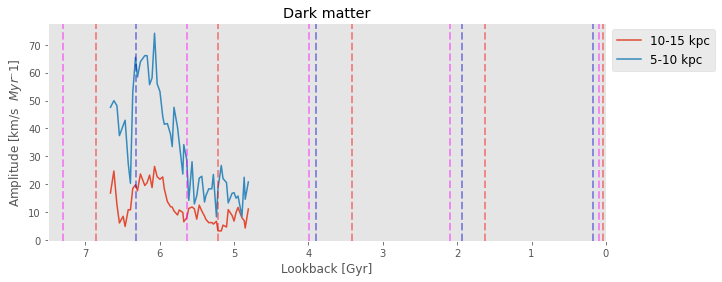

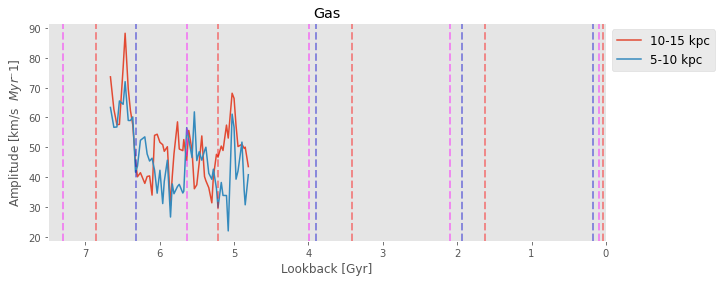

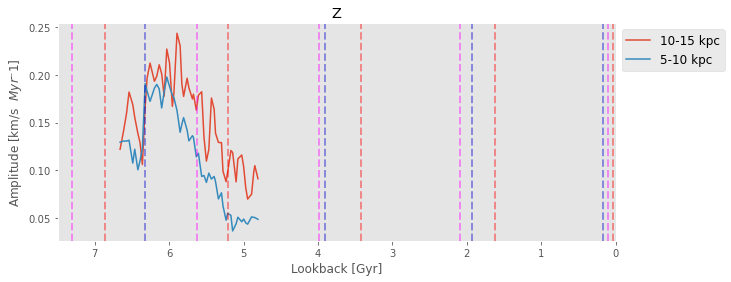

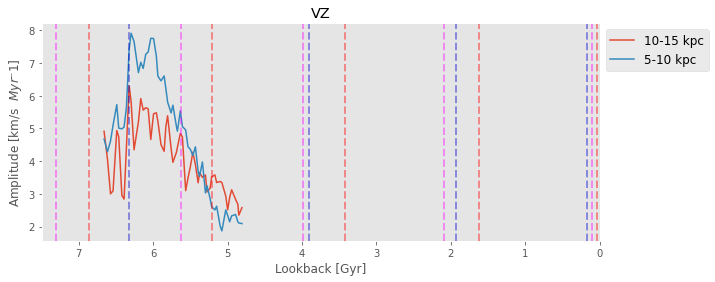

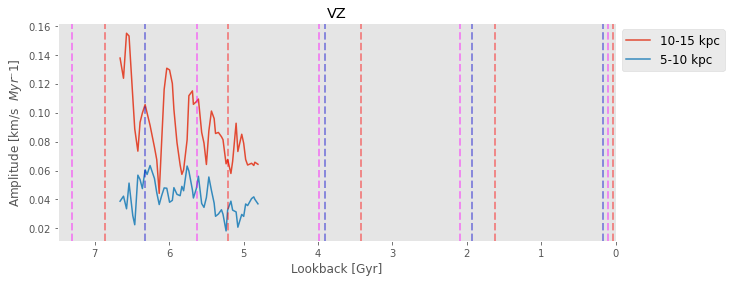

In [54]:
fig, ax = plt.subplots(figsize = (10,4))
plt.title("Dark matter")
ax.plot(epoch1_15["Lookback"],epoch1_15["DM"], label = "10-15 kpc")
ax.plot(epoch1_10["Lookback"],epoch1_10["DM"],label = "5-10 kpc")
#ax.plot(lookback,np.array(ac_dm_estimator_5)*seconds_to_Myr,label = "0-5 kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
ax.legend(fontsize = 12, bbox_to_anchor=(1, 1))
add_satellites(ax)
#fig.savefig("test.png")
#plt.savefig("results/DM_shells.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
plt.show()


fig, ax = plt.subplots(figsize = (10,4))
plt.title("Gas")
ax.plot(epoch1_15["Lookback"],epoch1_15["Gas"], label = "10-15 kpc")
ax.plot(epoch1_10["Lookback"],epoch1_10["Gas"],label = "5-10 kpc")
#ax.plot(lookback,np.array(ac_dm_estimator_5)*seconds_to_Myr,label = "0-5 kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
ax.legend(fontsize = 12, bbox_to_anchor=(1, 1))
add_satellites(ax)
#fig.savefig("test.png")
#plt.savefig("results/DM_shells.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
plt.show()



fig, ax = plt.subplots(figsize = (10,4))
plt.title("Z")
ax.plot(epoch1_15["Lookback"],epoch1_15["Z"], label = "10-15 kpc")
ax.plot(epoch1_10["Lookback"],epoch1_10["Z"],label = "5-10 kpc")
#ax.plot(lookback,np.array(ac_dm_estimator_5)*seconds_to_Myr,label = "0-5 kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
ax.legend(fontsize = 12, bbox_to_anchor=(1, 1))
add_satellites(ax)
#fig.savefig("test.png")
#plt.savefig("results/DM_shells.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
plt.show()


fig, ax = plt.subplots(figsize = (10,4))
plt.title("VZ")
ax.plot(epoch1_15["Lookback"],epoch1_15["VZ"], label = "10-15 kpc")
ax.plot(epoch1_10["Lookback"],epoch1_10["VZ"],label = "5-10 kpc")
#ax.plot(lookback,np.array(ac_dm_estimator_5)*seconds_to_Myr,label = "0-5 kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
ax.legend(fontsize = 12, bbox_to_anchor=(1, 1))
add_satellites(ax)
#fig.savefig("test.png")
#plt.savefig("results/DM_shells.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
plt.show()


fig, ax = plt.subplots(figsize = (10,4))
plt.title("VZ")
ax.plot(epoch1_15["Lookback"],epoch1_15["density"], label = "10-15 kpc")
ax.plot(epoch1_10["Lookback"],epoch1_10["density"],label = "5-10 kpc")
#ax.plot(lookback,np.array(ac_dm_estimator_5)*seconds_to_Myr,label = "0-5 kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
ax.legend(fontsize = 12, bbox_to_anchor=(1, 1))
add_satellites(ax)
#fig.savefig("test.png")
#plt.savefig("results/DM_shells.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
plt.show()


In [8]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [31]:
epoch1_15.drop('All', inplace=True, axis=1)
epoch1_10.drop('All', inplace=True, axis=1)

In [100]:
def apply_pca (datos, lookback):
   # datos = data.drop('All', inplace=True, axis=1)
  #  datos = epoch1_10
    # Entrenamiento modelo PCA con escalado de los datos
    # ==============================================================================
    pca_pipe = make_pipeline(StandardScaler(), PCA())
    pca_pipe.fit(datos)

    # Se extrae el modelo entrenado del pipeline
    modelo_pca = pca_pipe.named_steps['pca']


    # Se combierte el array a dataframe para añadir nombres a los ejes.
    result = pd.DataFrame(
        data    = modelo_pca.components_,
        columns = datos.columns,
        index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']
    )

#    print(modelo_pca.components_)
    # Heatmap componentes
    # ==============================================================================
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
    componentes = modelo_pca.components_
    plt.imshow(componentes.T, cmap='viridis', aspect='auto')
    plt.yticks(range(len(datos.columns)), datos.columns)
    plt.xticks(range(len(datos.columns)), np.arange(modelo_pca.n_components_) + 1)
    plt.grid(False)
    plt.colorbar();

    # Porcentaje de varianza explicada acumulada
    # ==============================================================================
    prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
    print('------------------------------------------')
    print('Porcentaje de varianza explicada acumulada')
    print('------------------------------------------')
    print(prop_varianza_acum)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
    ax.plot(
        np.arange(len(datos.columns)) + 1,
        prop_varianza_acum,
        marker = 'o'
    )

    for x, y in zip(np.arange(len(datos.columns)) + 1, prop_varianza_acum):
        label = round(y, 2)
        ax.annotate(
            label,
            (x,y),
            textcoords="offset points",
            xytext=(0,10),
            ha='center'
        )

    ax.set_ylim(0, 1.1)
    ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
    ax.set_title('Porcentaje de varianza explicada acumulada')
    ax.set_xlabel('Componente principal')
    ax.set_ylabel('Por. varianza acumulada');

    
    pca = PCA(n_components=3)
    principalComponents = pca.fit_transform(datos)
    principalDf = pd.DataFrame(data = principalComponents
                 , columns = ['PC1', 'PC2', 'PC3'])
    fig = plt.figure(figsize = (8,6))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
   # ax.set_title('2 component PCA', fontsize = 20)
    ll =   ax.scatter(principalDf.loc[:,'PC1'], principalDf.loc[:, 'PC2'], c = lookback, cmap = "jet")
    plt.colorbar(ll,label=  "Lookback")

    fig = plt.figure(figsize = (8,6))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 2', fontsize = 15)
    ax.set_ylabel('Principal Component 3', fontsize = 15)
  #  ax.set_title('2 component PCA', fontsize = 20)
    ll = ax.scatter(principalDf.loc[:,'PC2'], principalDf.loc[:, 'PC3'], c = lookback,  cmap = "jet")
    plt.colorbar(ll,label=  "Lookback")
    #cbar = fig.colorbar(ll, cax=ax,  label=  "Lookback")
    
    fig = plt.figure(figsize = (8,6))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 3', fontsize = 15)
  #  ax.set_title('2 component PCA', fontsize = 20)
    ll = ax.scatter(principalDf.loc[:,'PC1'], principalDf.loc[:, 'PC3'], c = lookback, cmap = "jet")
    plt.colorbar(ll,label=  "Lookback")
    #cbar = fig.colorbar(ll, cax=ax,  label=  "Lookback")
    

In [69]:
epoch1_15 = df15.loc[indr==3]
epoch1_10 = df10.loc[indr==3]
epoch1_5 = df5.loc[indr==3]

epoch1_15.drop('All', inplace=True, axis=1)
epoch1_10.drop('All', inplace=True, axis=1)

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.6289125  0.79671543 0.88002707 0.94809298 0.97002922 0.98609625
 0.99724369 1.        ]


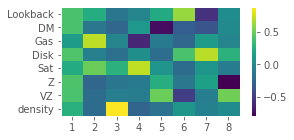

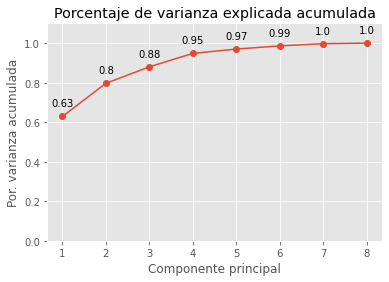

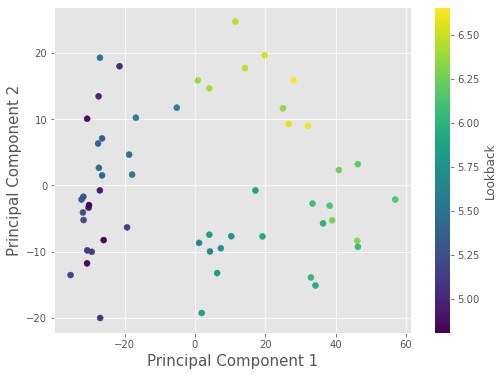

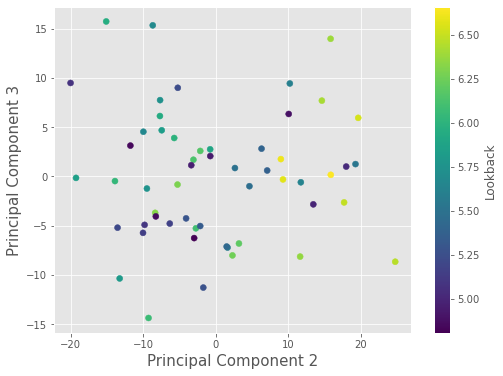

In [70]:
apply_pca (epoch1_10)

In [65]:
epoch2_15 = df15.loc[indr==1]
epoch2_10 = df10.loc[indr==1]
epoch2_5 = df5.loc[indr==1]

epoch2_15.drop('All', inplace=True, axis=1)
epoch2_10.drop('All', inplace=True, axis=1)

In [71]:
epoch3_15 = df15.loc[indr==1]
epoch3_10 = df10.loc[indr==1]
epoch3_5 = df5.loc[indr==1]

epoch3_15.drop('All', inplace=True, axis=1)
epoch3_10.drop('All', inplace=True, axis=1)

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.47277262 0.74988858 0.83905416 0.90523703 0.94895387 0.97002896
 0.98856653 1.        ]


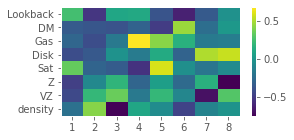

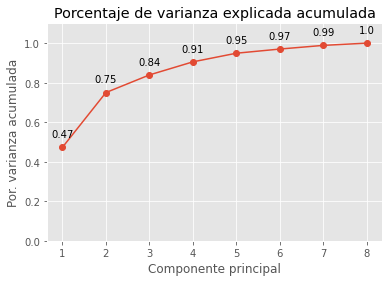

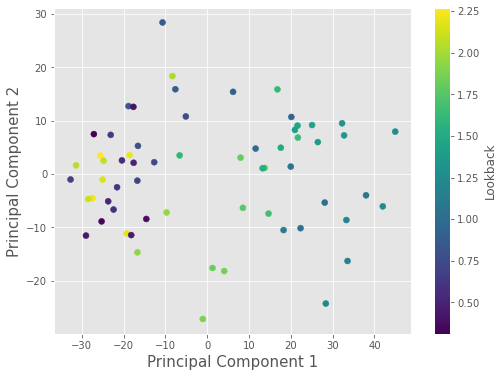

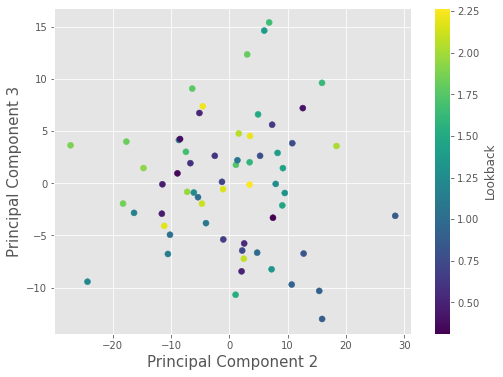

In [72]:
apply_pca (epoch3_10)

In [98]:
epoch_all_15 = df15.copy()
epoch_all_10 = df10.copy()
epoch_all_15.drop('All', inplace=True, axis=1)
epoch_all_10.drop('All', inplace=True, axis=1)

epoch_all_15.drop('Lookback', inplace=True, axis=1)
epoch_all_10.drop('Lookback', inplace=True, axis=1)
epoch_all_15.drop('Disk', inplace=True, axis=1)
epoch_all_10.drop('Disk', inplace=True, axis=1)

In [88]:
df15

,Lookback,All,DM,Gas,Disk,Sat,Z,VZ,density
0,7.641375,106.202469,40.023762,66.178707,15.049670,0.024477,0.429847,13.346531,0.161309
1,7.596713,80.973760,35.507212,45.466547,17.795416,0.033394,0.516910,11.069785,0.155225
2,7.566684,53.800446,25.542967,28.257479,19.137192,0.041124,0.500485,9.681947,0.197279
3,7.533391,52.556993,35.062158,17.494836,15.813274,0.051349,0.470980,10.109497,0.201293
4,7.482980,64.839175,27.685772,37.153402,13.509964,0.066845,0.356758,11.589737,0.130261
...,...,...,...,...,...,...,...,...,...
219,0.160155,40.722998,12.924697,27.798301,12.136108,0.545639,0.128515,2.298540,0.565066
220,0.140454,39.377830,13.089089,26.288741,13.279948,0.541135,0.121384,1.972196,0.598089
221,0.100925,37.512495,12.950851,24.561643,11.939660,0.493460,0.091059,2.582888,0.574378
222,0.079098,46.856131,16.516670,30.339461,13.281444,0.449974,0.100693,2.903617,0.571380


------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.44124784 0.6165554  0.78919668 0.9163627  0.98981995 1.        ]


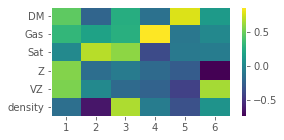

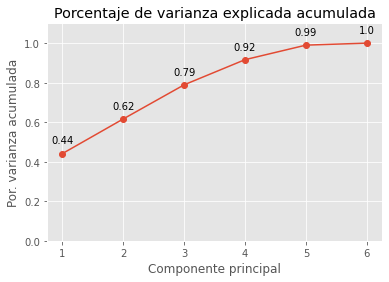

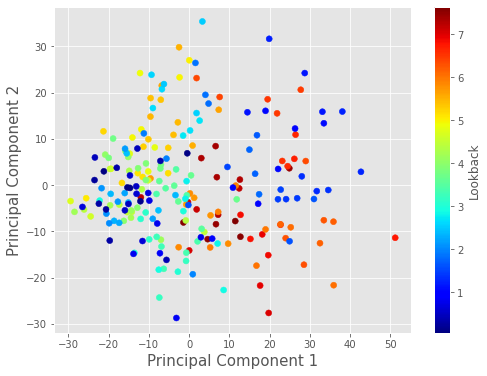

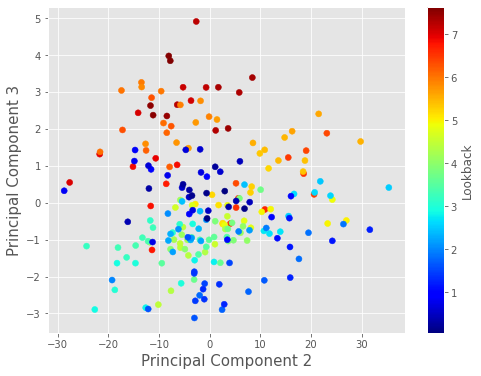

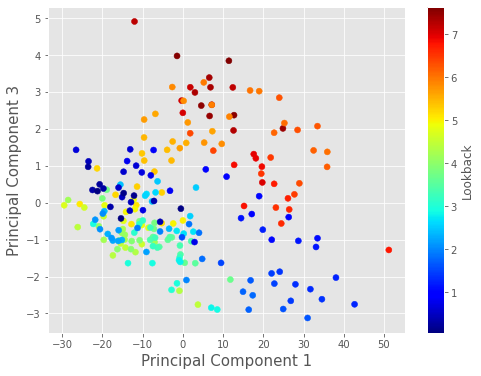

In [103]:
apply_pca (epoch_all_10, np.array(df15["Lookback"]))

[[-4.10449544e-01 -3.87043317e-01 -6.81646080e-05 -4.31854528e-01
  -8.57603173e-02 -4.51988942e-01 -4.31906739e-01 -3.11509289e-01]
 [-4.43703084e-02  1.39596155e-01  6.87237338e-01  7.30979749e-02
   6.61841170e-01 -8.54406276e-02 -2.94383376e-02 -2.33891568e-01]
 [-2.82822914e-02 -1.07378673e-01 -2.09163177e-01 -2.71421872e-01
   5.08937595e-01 -1.85733495e-01 -5.82807536e-02  7.57192058e-01]
 [-3.27782291e-01  3.00835088e-01 -6.52577487e-01  1.24222094e-01
   4.50630142e-01  6.08951431e-02  4.57057003e-02 -3.89748329e-01]
 [ 4.48836642e-01 -7.56695326e-01 -1.82336814e-01  1.98823852e-01
   2.90050011e-01  1.04417362e-01  5.52189369e-02 -2.34731950e-01]
 [ 5.12278147e-01  3.13855218e-01 -1.28222447e-01  2.08216928e-01
   1.04270177e-02 -2.30630049e-01 -7.25050785e-01 -1.65268002e-02]
 [ 5.07374528e-01  2.39969810e-01 -8.26791068e-02 -6.61291732e-01
   4.03930819e-02 -2.08429083e-01  3.59820876e-01 -2.57483285e-01]
 [ 3.03082394e-03  1.72058681e-04  3.96822468e-02 -4.45943296e-01
   

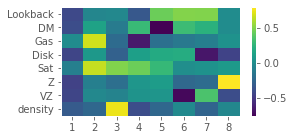

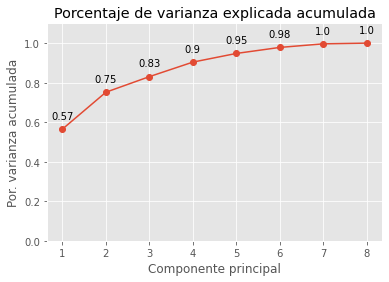

In [10]:
epoch1_10.drop('All', inplace=True, axis=1)
datos = epoch1_10
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']


# Se combierte el array a dataframe para añadir nombres a los ejes.
result = pd.DataFrame(
    data    = modelo_pca.components_,
    columns = datos.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7', 'PC8']
)

print(modelo_pca.components_)
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(datos.columns)), datos.columns)
plt.xticks(range(len(datos.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(datos.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(datos.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [42]:
modelo_pca.__dict__.keys()

dict_keys(['n_components', 'copy', 'whiten', 'svd_solver', 'tol', 'iterated_power', 'random_state', 'n_features_in_', '_fit_svd_solver', 'mean_', 'noise_variance_', 'n_samples_', 'n_features_', 'components_', 'n_components_', 'explained_variance_', 'explained_variance_ratio_', 'singular_values_'])

In [15]:
print(modelo_pca.explained_variance_)

[4.57737964 1.51222796 0.63815823 0.59551163 0.35541181 0.24654944
 0.14660789 0.02941922]


In [26]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(datos)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', 'PC3'])

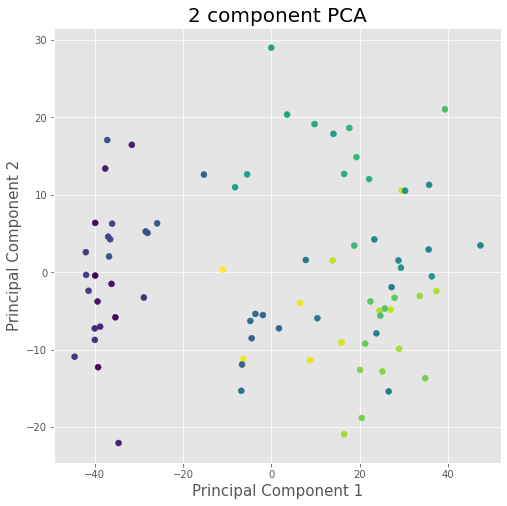

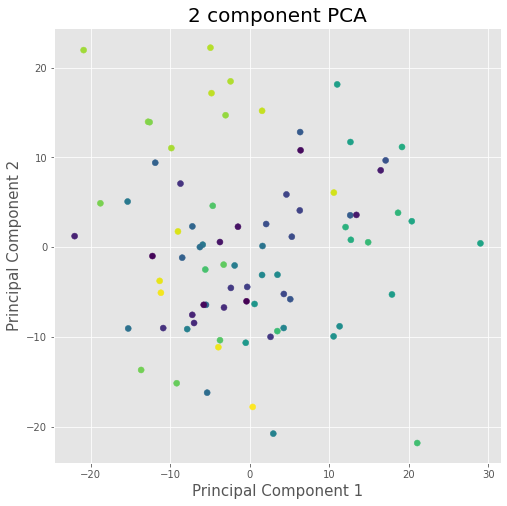

In [27]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf.loc[:,'PC1'], principalDf.loc[:, 'PC2'], c = datos["Lookback"])

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf.loc[:,'PC2'], principalDf.loc[:, 'PC3'], c = datos["Lookback"])


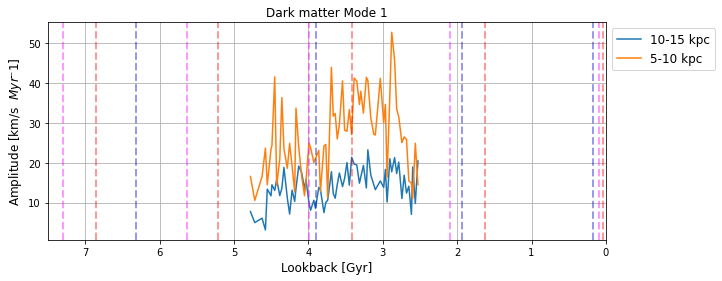

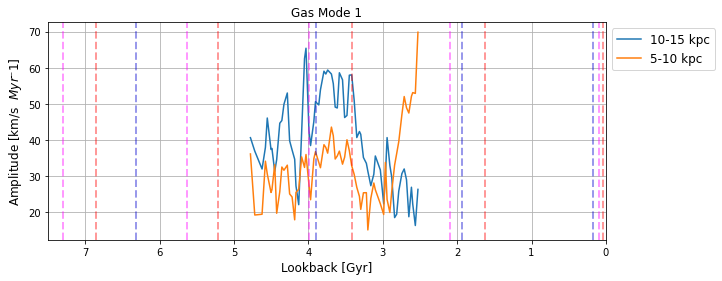

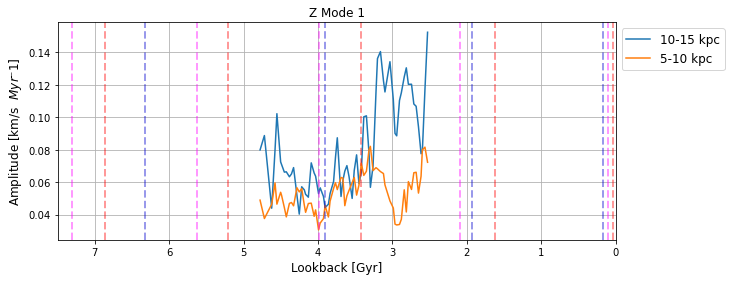

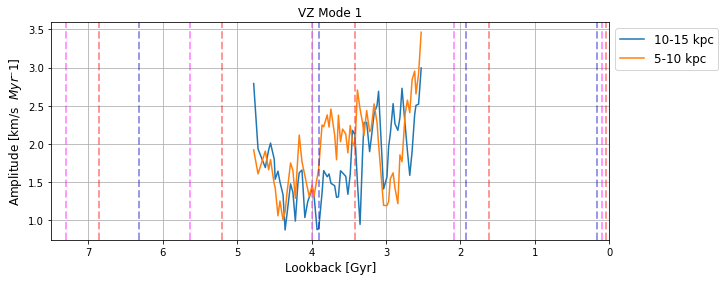

In [11]:
#Epoch 2
      
epoch2_15 = df15.loc[indr==1]
epoch2_10 = df10.loc[indr==1]
epoch2_5 = df5.loc[indr==1]


fig, ax = plt.subplots(figsize = (10,4))
plt.title("Dark matter Mode 1")
ax.plot(epoch2_15["Lookback"],epoch2_15["DM"], label = "10-15 kpc")
ax.plot(epoch2_10["Lookback"],epoch2_10["DM"],label = "5-10 kpc")
#ax.plot(lookback,np.array(ac_dm_estimator_5)*seconds_to_Myr,label = "0-5 kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
ax.legend(fontsize = 12, bbox_to_anchor=(1, 1))
add_satellites(ax)
#fig.savefig("test.png")
#plt.savefig("results/DM_shells.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
plt.show()


fig, ax = plt.subplots(figsize = (10,4))
plt.title("Gas Mode 1")
ax.plot(epoch2_15["Lookback"],epoch2_15["Gas"], label = "10-15 kpc")
ax.plot(epoch2_10["Lookback"],epoch2_10["Gas"],label = "5-10 kpc")
#ax.plot(lookback,np.array(ac_dm_estimator_5)*seconds_to_Myr,label = "0-5 kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
ax.legend(fontsize = 12, bbox_to_anchor=(1, 1))
add_satellites(ax)
#fig.savefig("test.png")
#plt.savefig("results/DM_shells.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
plt.show()



fig, ax = plt.subplots(figsize = (10,4))
plt.title("Z Mode 1")
ax.plot(epoch2_15["Lookback"],epoch2_15["Z"], label = "10-15 kpc")
ax.plot(epoch2_10["Lookback"],epoch2_10["Z"],label = "5-10 kpc")
#ax.plot(lookback,np.array(ac_dm_estimator_5)*seconds_to_Myr,label = "0-5 kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
ax.legend(fontsize = 12, bbox_to_anchor=(1, 1))
add_satellites(ax)
#fig.savefig("test.png")
#plt.savefig("results/DM_shells.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
plt.show()


fig, ax = plt.subplots(figsize = (10,4))
plt.title("VZ Mode 1")
ax.plot(epoch2_15["Lookback"],epoch2_15["VZ"], label = "10-15 kpc")
ax.plot(epoch2_10["Lookback"],epoch2_10["VZ"],label = "5-10 kpc")
#ax.plot(lookback,np.array(ac_dm_estimator_5)*seconds_to_Myr,label = "0-5 kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
ax.legend(fontsize = 12, bbox_to_anchor=(1, 1))
add_satellites(ax)
#fig.savefig("test.png")
#plt.savefig("results/DM_shells.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
plt.show()


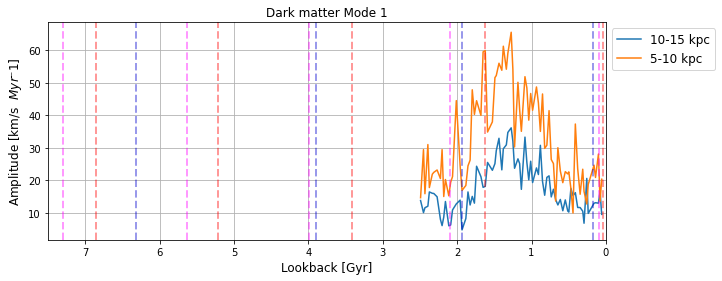

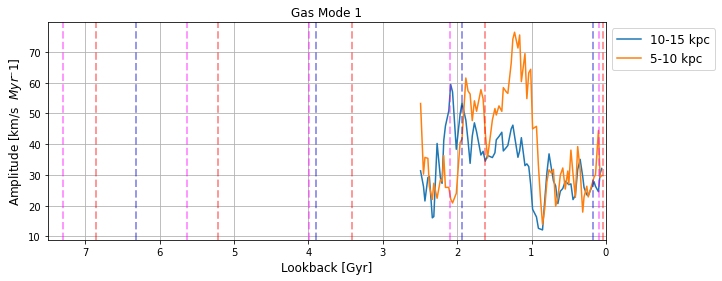

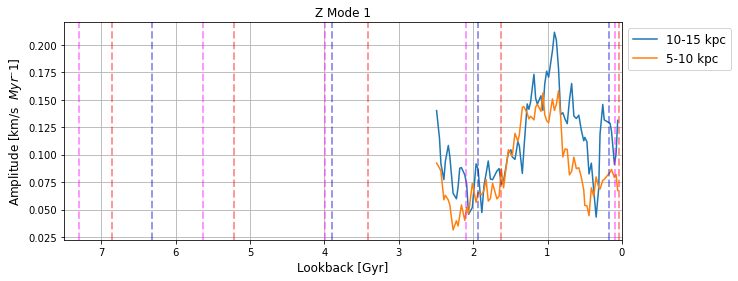

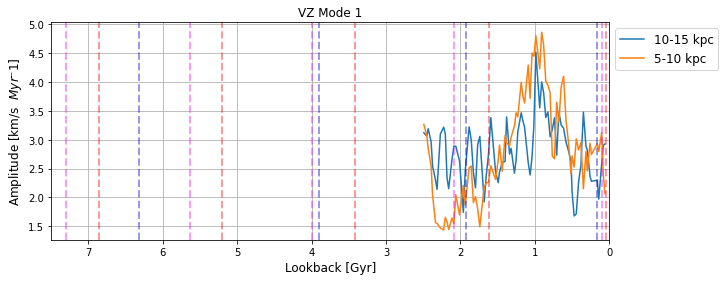

In [12]:
#Epoch 3
      
epoch3_15 = df15.loc[indr==0]
epoch3_10 = df10.loc[indr==0]
epoch3_5 = df5.loc[indr==0]


fig, ax = plt.subplots(figsize = (10,4))
plt.title("Dark matter Mode 1")
ax.plot(epoch3_15["Lookback"],epoch3_15["DM"], label = "10-15 kpc")
ax.plot(epoch3_10["Lookback"],epoch3_10["DM"],label = "5-10 kpc")
#ax.plot(lookback,np.array(ac_dm_estimator_5)*seconds_to_Myr,label = "0-5 kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
ax.legend(fontsize = 12, bbox_to_anchor=(1, 1))
add_satellites(ax)
#fig.savefig("test.png")
#plt.savefig("results/DM_shells.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
plt.show()


fig, ax = plt.subplots(figsize = (10,4))
plt.title("Gas Mode 1")
ax.plot(epoch3_15["Lookback"],epoch3_15["Gas"], label = "10-15 kpc")
ax.plot(epoch3_10["Lookback"],epoch3_10["Gas"],label = "5-10 kpc")
#ax.plot(lookback,np.array(ac_dm_estimator_5)*seconds_to_Myr,label = "0-5 kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
ax.legend(fontsize = 12, bbox_to_anchor=(1, 1))
add_satellites(ax)
#fig.savefig("test.png")
#plt.savefig("results/DM_shells.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
plt.show()



fig, ax = plt.subplots(figsize = (10,4))
plt.title("Z Mode 1")
ax.plot(epoch3_15["Lookback"],epoch3_15["Z"], label = "10-15 kpc")
ax.plot(epoch3_10["Lookback"],epoch3_10["Z"],label = "5-10 kpc")
#ax.plot(lookback,np.array(ac_dm_estimator_5)*seconds_to_Myr,label = "0-5 kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
ax.legend(fontsize = 12, bbox_to_anchor=(1, 1))
add_satellites(ax)
#fig.savefig("test.png")
#plt.savefig("results/DM_shells.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
plt.show()


fig, ax = plt.subplots(figsize = (10,4))
plt.title("VZ Mode 1")
ax.plot(epoch3_15["Lookback"],epoch3_15["VZ"], label = "10-15 kpc")
ax.plot(epoch3_10["Lookback"],epoch3_10["VZ"],label = "5-10 kpc")
#ax.plot(lookback,np.array(ac_dm_estimator_5)*seconds_to_Myr,label = "0-5 kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
ax.legend(fontsize = 12, bbox_to_anchor=(1, 1))
add_satellites(ax)
#fig.savefig("test.png")
#plt.savefig("results/DM_shells.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
plt.show()
